In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('dataset/tmdb_5000_movies.csv/tmdb_5000_movies.csv', low_memory=False)

In [4]:
df.head(4)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


In [5]:
df_2=df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
mean=df['vote_average'].mean()
mean

6.092171559442011

In [8]:
minvote=df['vote_count'].quantile(0.9)
minvote

1838.4000000000015

In [9]:
filtered_df=df.copy().loc[df['vote_count']>=minvote]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 4602
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                481 non-null    int64  
 1   genres                481 non-null    object 
 2   homepage              349 non-null    object 
 3   id                    481 non-null    int64  
 4   keywords              481 non-null    object 
 5   original_language     481 non-null    object 
 6   original_title        481 non-null    object 
 7   overview              481 non-null    object 
 8   popularity            481 non-null    float64
 9   production_companies  481 non-null    object 
 10  production_countries  481 non-null    object 
 11  release_date          481 non-null    object 
 12  revenue               481 non-null    int64  
 13  runtime               481 non-null    float64
 14  spoken_languages      481 non-null    object 
 15  status                

In [10]:
def weightedavg(x, minvote=minvote, mean=mean):
    voters=x['vote_count']
    avg_vote=x['vote_average']
    return (voters/(voters+minvote)*avg_vote) + (minvote/(minvote+voters)*mean)

In [11]:
filtered_df['score']=filtered_df.apply(weightedavg,axis=1)


In [12]:
filtered_df=filtered_df.sort_values('score',ascending=False)

In [13]:
filtered_df[['title','vote_count','popularity','score']].head(20)

,title,vote_count,popularity,score
1881,The Shawshank Redemption,8205,136.747729,8.059258
662,Fight Club,9413,146.757391,7.939256
65,The Dark Knight,12002,187.322927,7.920020
3232,Pulp Fiction,8428,121.463076,7.904645
96,Inception,13752,167.583710,7.863239
3337,The Godfather,5893,143.659698,7.851236
95,Interstellar,10867,724.247784,7.809479
809,Forrest Gump,7927,138.133331,7.803188
329,The Lord of the Rings: The Return of the King,8064,123.630332,7.727243
1990,The Empire Strikes Back,5879,78.517830,7.697884


In [20]:
filtered_df['title'].values[0]

'The Shawshank Redemption'

Text(0.5, 1.0, 'TOP RATED MOVIES')

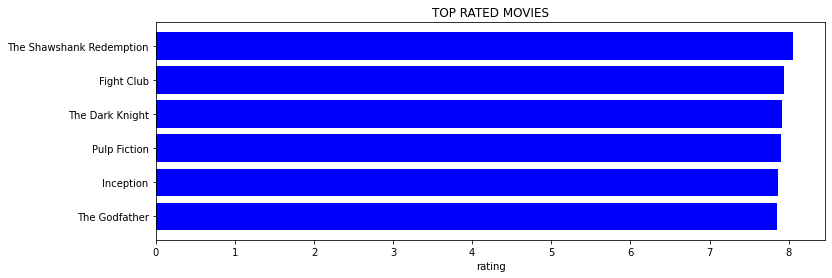

In [14]:
pop= filtered_df.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("rating")
plt.title("TOP RATED MOVIES")

In [17]:
import pickle
pickle.dump(filtered_df,open('top20.pkl','wb'))